In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/top-1000-youtube-channels-in-the-world/Top Youtubers Dataset.csv', encoding='latin')

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,52402898889.00,803,Entertainment,2012
1,2,T-Series,268000000,258624000000.00,21237,Music,2006
2,3,YouTube Movies,181000000,0.00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,182881000000.00,1188,Education,2006
4,5,SET India,174000000,165395000000.00,139720,Shows,2006


In [5]:
df.shape

(1000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   Subscribers  1000 non-null   int64  
 3   Video Views  1000 non-null   float64
 4   Video Count  1000 non-null   int64  
 5   Category     957 non-null    object 
 6   Started      1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [7]:
df['Video Views'] = df['Video Views'].astype(int)

In [8]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,26624300.00,13301332968.48,12461.28,2013.60
std,288.82,20067680.77,16041795532.78,43098.75,4.61
min,1.00,14500000.00,0.00,0.00,1970.00
25%,250.75,16700000.00,5272816660.50,518.50,2011.00
50%,500.50,20800000.00,9790981375.50,1242.00,2014.00
75%,750.25,29275000.00,16264534026.00,3981.00,2017.00
max,1000.00,284000000.00,258624000000.00,386195.00,2024.00


In [9]:
video_views_threshold = 1000000 
subscribers_threshold = 1000000 
video_count_threshold = 100     

df = df[(df['Video Views'] >= video_views_threshold) &
        (df['Subscribers'] >= subscribers_threshold) &
        (df['Video Count'] >= video_count_threshold)]

In [10]:
df.shape

(951, 7)

In [11]:
df.tail()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
995,996,Peppa Pig em Português Brasil - Canal Oficial,14500000,5040493786,1657,Film & Animation,2014
996,997,Bie The Ska,14500000,4924884083,1832,Entertainment,2006
997,998,Cyprien,14500000,3194240254,252,Comedy,2007
998,999,YANA CHIRKINA,14500000,10487538339,2189,Sports,2018
999,1000,Tayo Bus Kecil - Tayo Bahasa Indonesia,14500000,7251267100,1260,Film & Animation,2016


In [12]:
print(df[df['Started'] < 2005])
df = df[df['Started'] >= 2005]

     Rank Youtuber  Subscribers  Video Views  Video Count         Category  \
116   117  YouTube     40700000   2876535428          727  News & Politics   

     Started  
116     1970  


In [13]:
df.shape

(950, 7)

In [14]:
print(df[df['Started'] > 2024])
df = df[df['Started'] <= 2024]

Empty DataFrame
Columns: [Rank, Youtuber, Subscribers, Video Views, Video Count, Category, Started]
Index: []


In [15]:
df.isnull().sum()

Rank            0
Youtuber        0
Subscribers     0
Video Views     0
Video Count     0
Category       34
Started         0
dtype: int64

In [16]:
df['Category'].fillna('Unknown', inplace=True)

In [17]:
df.duplicated().sum()

0

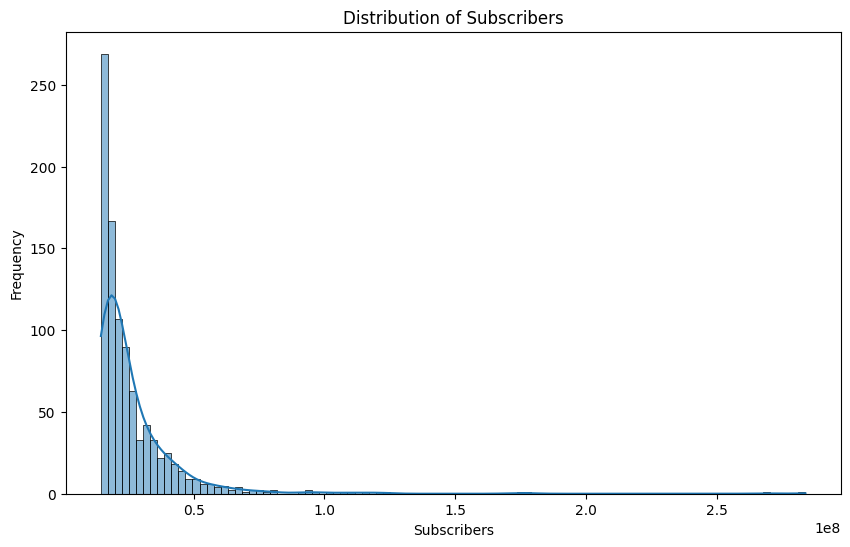

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Subscribers'], bins=100, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

In [19]:
top_10_subscribed = df.nlargest(10, 'Subscribers')[['Youtuber', 'Subscribers']]
print("Top 10 subscribed YouTubers:")
print(top_10_subscribed)

Top 10 subscribed YouTubers:
                      Youtuber  Subscribers
0                      MrBeast    284000000
1                     T-Series    268000000
3   Cocomelon - Nursery Rhymes    177000000
4                    SET India    174000000
5            ? Kids Diana Show    123000000
7                Vlad and Niki    120000000
8                  Like Nastya    116000000
9                    PewDiePie    111000000
10           Zee Music Company    108000000
11                         WWE    102000000


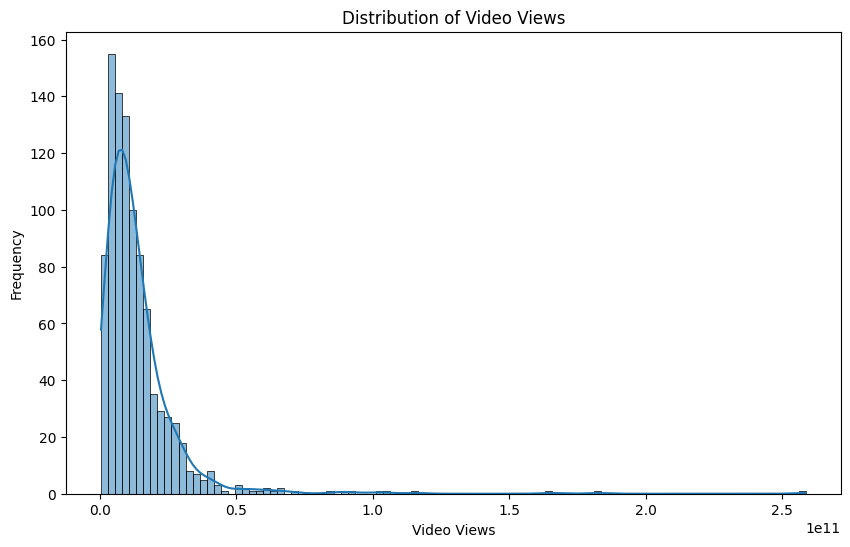

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Views'], bins=100, kde=True)
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.show()

In [21]:
top_10_viewed = df.nlargest(10, 'Video Views')[['Youtuber', 'Video Views']]
print("Top 10 YouTubers with most views")
print(top_10_viewed)

Top 10 YouTubers with most views
                      Youtuber   Video Views
1                     T-Series  258624000000
3   Cocomelon - Nursery Rhymes  182881000000
4                    SET India  165395000000
15                    Sony SAB  115866000000
5            ? Kids Diana Show  103973000000
8                  Like Nastya  101394000000
7                Vlad and Niki   91646190811
17                      Zee TV   90000427523
11                         WWE   85384982910
23                   Colors TV   71364800889


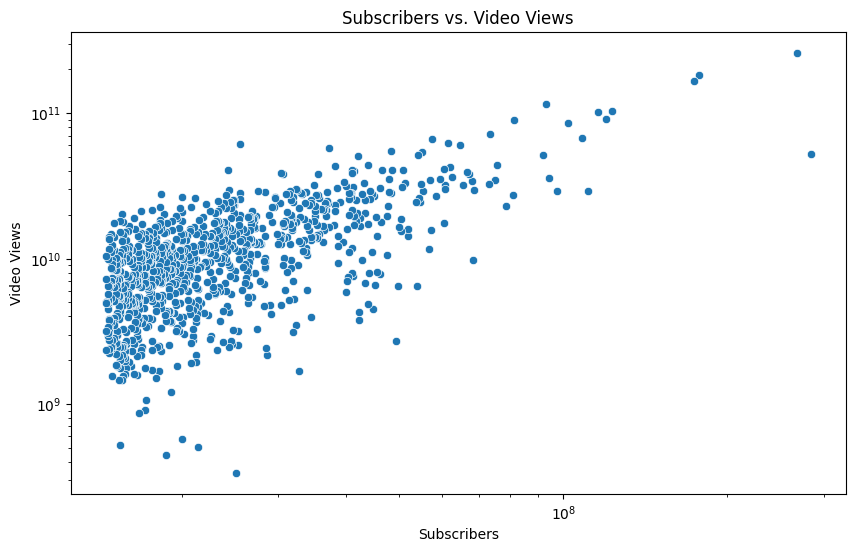

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Subscribers'], y=df['Video Views'])
plt.title('Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.xscale('log') 
plt.yscale('log') 
plt.show()

In [23]:
top_youtubers = pd.merge(top_10_subscribed, top_10_viewed, on='Youtuber')
print("YouTubers with most subscribers and most views:")
print(top_youtubers)

YouTubers with most subscribers and most views:
                     Youtuber  Subscribers   Video Views
0                    T-Series    268000000  258624000000
1  Cocomelon - Nursery Rhymes    177000000  182881000000
2                   SET India    174000000  165395000000
3           ? Kids Diana Show    123000000  103973000000
4               Vlad and Niki    120000000   91646190811
5                 Like Nastya    116000000  101394000000
6                         WWE    102000000   85384982910


In [24]:
top_10_no_of_videos = df.nlargest(10, 'Video Count')[['Youtuber', 'Video Count']]

print("Top 10 YouTubers with most videos:")
print(top_10_no_of_videos)

Top 10 YouTubers with most videos:
                  Youtuber  Video Count
515        TV9 Bharatvarsh       386195
86                ABP NEWS       383685
30                 Aaj Tak       368830
962    GMA Integrated News       333517
695               KOMPASTV       314530
101                IndiaTV       306269
455                News 24       296796
658  THAIRATH TV Originals       282241
311           News18 India       260736
829               Geo News       234089


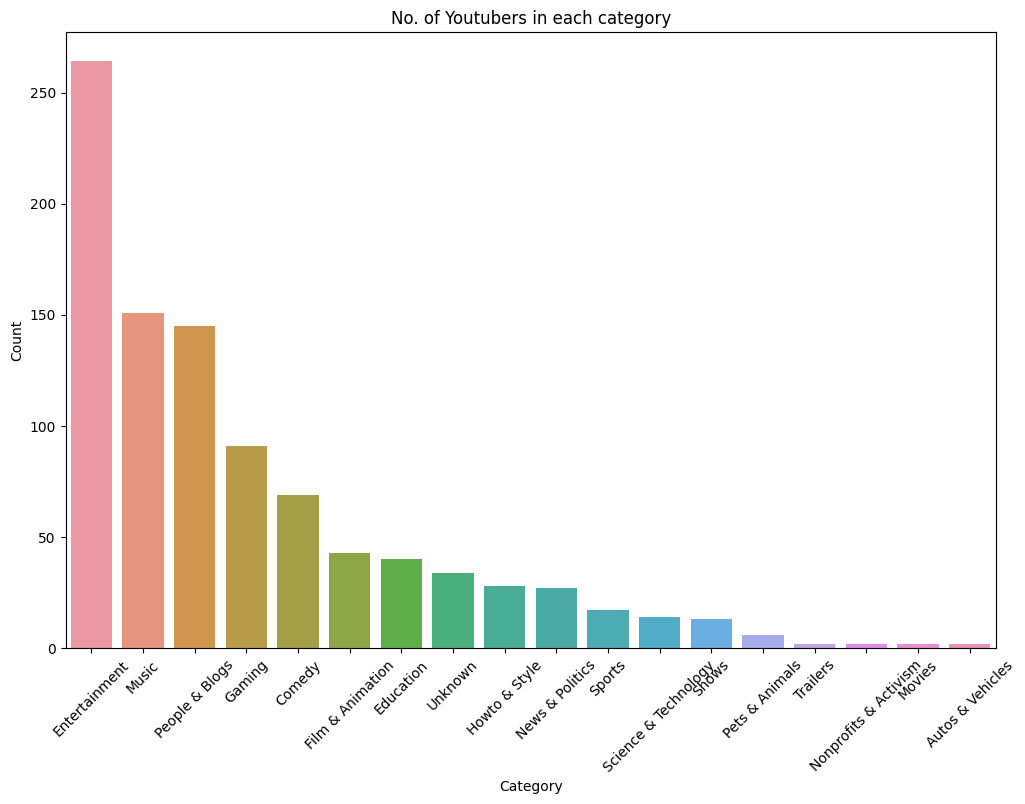

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('No. of Youtubers in each category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
top_youtubers_by_category = df.loc[df.groupby('Category')['Subscribers'].idxmax()]

print("Top YouTuber in each category based on Subscribers:")
print(top_youtubers_by_category[['Category', 'Youtuber', 'Subscribers']])

Top YouTuber in each category based on Subscribers:
                  Category                            Youtuber  Subscribers
346       Autos & Vehicles                        DUDU e CAROL     24700000
71                  Comedy                    Alan Chikin Chow     46600000
3                Education          Cocomelon - Nursery Rhymes    177000000
0            Entertainment                             MrBeast    284000000
12        Film & Animation                           Goldmines     97500000
9                   Gaming                           PewDiePie    111000000
18           Howto & Style                     5-Minute Crafts     80700000
191                 Movies                       Aditya Movies     33000000
1                    Music                            T-Series    268000000
30         News & Politics                             Aaj Tak     65600000
111  Nonprofits & Activism                          TEDx Talks     40900000
5           People & Blogs          

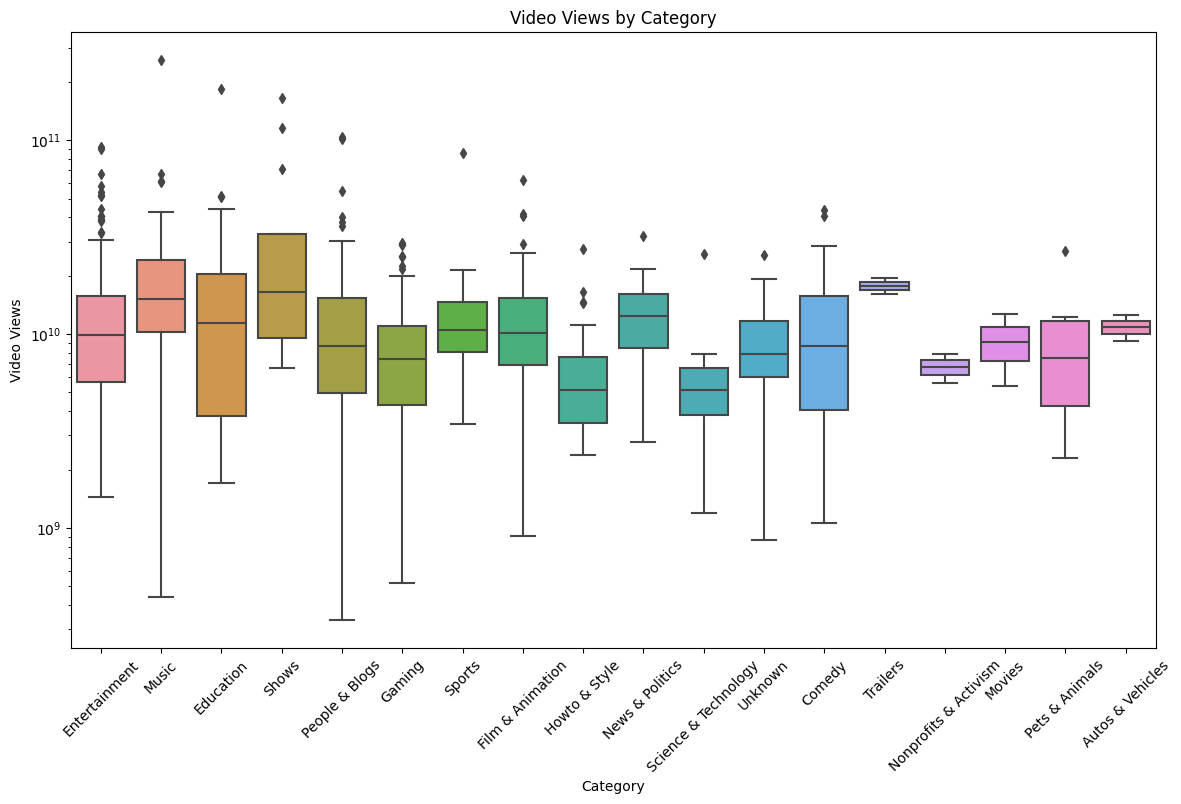

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Category', y='Video Views')
plt.title('Video Views by Category')
plt.xlabel('Category')
plt.ylabel('Video Views')
plt.xticks(rotation=45)
plt.yscale('log') 

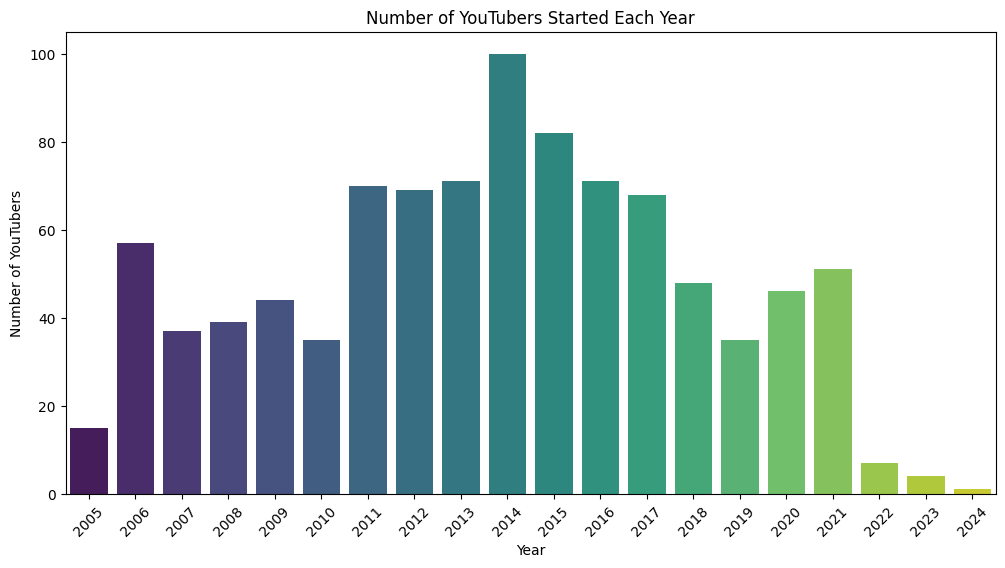

In [28]:
year_counts = df['Started'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of YouTubers Started Each Year')
plt.xlabel('Year')
plt.ylabel('Number of YouTubers')
plt.xticks(rotation=45)
plt.show()

In [29]:
before_2010 = df[df['Started'] < 2010].nlargest(10, 'Subscribers')
in_2010s = df[(df['Started'] >= 2010) & (df['Started'] < 2020)].nlargest(10, 'Subscribers')
after_2020 = df[df['Started'] > 2020].nlargest(10, 'Subscribers')

print("Top 10 YouTubers before 2010:")
print(before_2010[['Youtuber', 'Subscribers']])
print("\nTop 10 YouTubers in the 2010s:")
print(in_2010s[['Youtuber', 'Subscribers']])
print("\nTop 10 YouTubers after 2020:")
print(after_2020[['Youtuber', 'Subscribers']])

Top 10 YouTubers before 2010:
                      Youtuber  Subscribers
1                     T-Series    268000000
3   Cocomelon - Nursery Rhymes    177000000
4                    SET India    174000000
11                         WWE    102000000
15                    Sony SAB     93000000
17                      Zee TV     81200000
21                 HYBE LABELS     75000000
23                   Colors TV     73400000
24               Justin Bieber     73100000
26                Stokes Twins     68300000

Top 10 YouTubers in the 2010s:
                                 Youtuber  Subscribers
0                                 MrBeast    284000000
5                       ? Kids Diana Show    123000000
7                           Vlad and Niki    120000000
8                             Like Nastya    116000000
9                               PewDiePie    111000000
10                      Zee Music Company    108000000
12                              Goldmines     97500000
13            

In [30]:
first_youtubers = df.loc[df.groupby('Category')['Started'].idxmin()]

print("First Top YouTuber in each category:")
print(first_youtubers[['Category', 'Youtuber', 'Started']])

First Top YouTuber in each category:
                  Category                    Youtuber  Started
563       Autos & Vehicles            Supercar Blondie     2007
294                 Comedy                       Smosh     2005
3                Education  Cocomelon - Nursery Rhymes     2006
17           Entertainment                      Zee TV     2005
34        Film & Animation                  Movieclips     2006
863                 Gaming                 PlayStation     2005
606          Howto & Style             Manual do Mundo     2006
304                 Movies         Ultra Movie Parlour     2011
282                  Music                     Beyoncé     2005
781        News & Politics                         CNN     2005
111  Nonprofits & Activism                  TEDx Talks     2009
73          People & Blogs                     Shakira     2005
468         Pets & Animals            Brave Wilderness     2014
589   Science & Technology                       Apple     2005
4  